This part was not included in the manuscript.
use this notebook to build LR models for hub essentiality classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [ ]:
feature_cols = ['CTCF.narrow.rep-1', 'CTCF.narrow.rep-2',
       'RAD21.narrow.rep-1', 'RAD21.narrow.rep-2', 'SMC3.narrow.rep-1',
       'H3K27ac.narrow.rep-1', 'H3K27me3.narrow.rep-1', 'H3K27me3.broad.rep-2',
       'H3K36me3.narrow.rep-1', 'H3K36me3.narrow.rep-2',
       'H3K36me3.broad.rep-3', 'H3K4me1.narrow.rep-1', 'H3K4me1.narrow.rep-2',
       'H3K4me2.narrow.rep-1', 'H3K4me3.narrow.rep-1', 'H3K4me3.narrow.rep-2',
       'H3K9ac.narrow.rep-1', 'H3K9ac.narrow.rep-2', 'H3K9me3.narrow.rep-1',
       'H3K9me3.broad.rep-2', 'H4K20me1.narrow.rep-1', 'ATAC'] # define feature of your interest

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
from sklearn.metrics import (
    balanced_accuracy_score,
    average_precision_score,
    confusion_matrix,
    f1_score,
    classification_report,
    recall_score,
    roc_auc_score,
    auc,
    precision_score,
    precision_recall_curve,
    )


you should load node_meta and hub_ess_information here

--------------------------------------------------------------
top3PC+GC+use_centrality:core_histone+ATAC


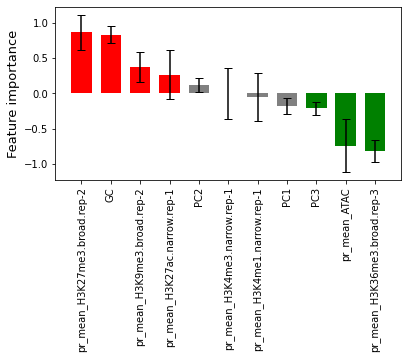

--------------------------------------------------------------
top3PC+GC+use_centrality:core_histone+noATAC


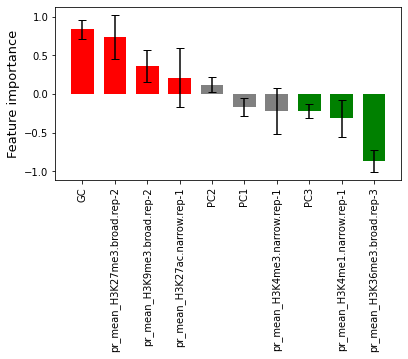

--------------------------------------------------------------
top3PC+GC+use_centrality:9_histone+ATAC


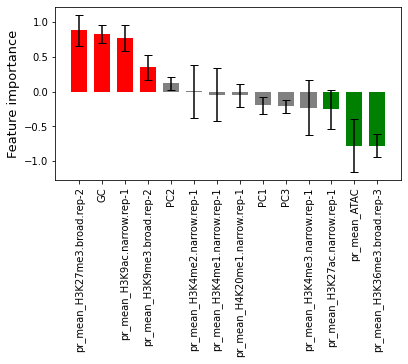

--------------------------------------------------------------
top3PC+GC+use_centrality:9_histone+noATAC


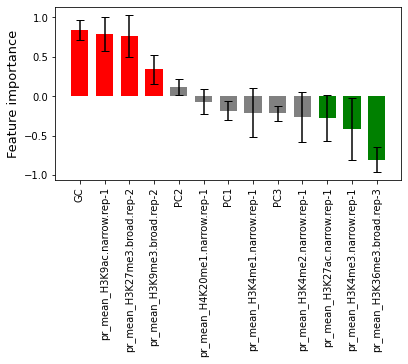

--------------------------------------------------------------
top3PC+GC+use_centrality:no_histone+ATAC


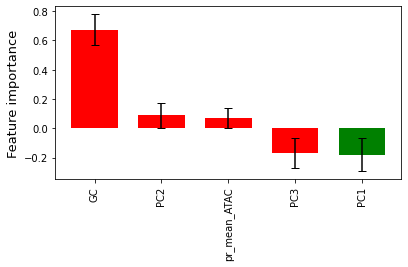

--------------------------------------------------------------
top3PC+GC+use_centrality:no_histone+noATAC


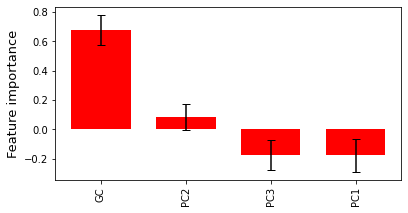

--------------------------------------------------------------
top3PC+noGC+use_centrality:core_histone+ATAC


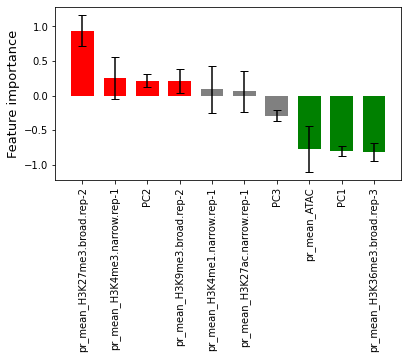

--------------------------------------------------------------
top3PC+noGC+use_centrality:core_histone+noATAC


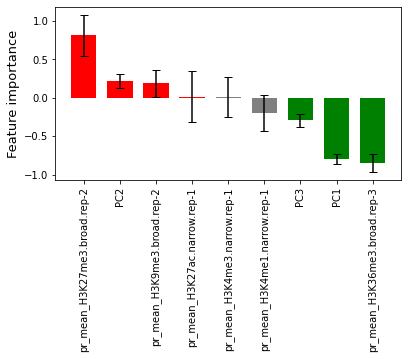

--------------------------------------------------------------
top3PC+noGC+use_centrality:9_histone+ATAC


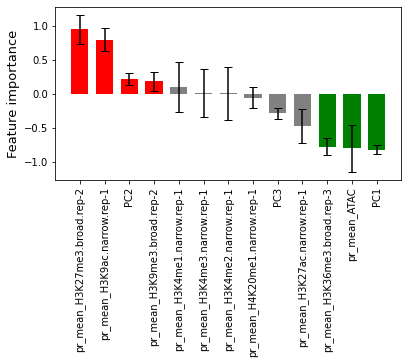

--------------------------------------------------------------
top3PC+noGC+use_centrality:9_histone+noATAC


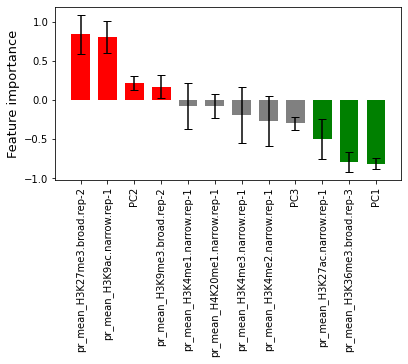

--------------------------------------------------------------
top3PC+noGC+use_centrality:no_histone+ATAC


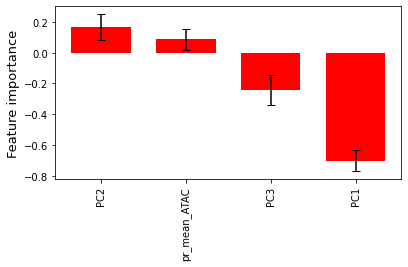

--------------------------------------------------------------
top3PC+noGC+use_centrality:no_histone+noATAC


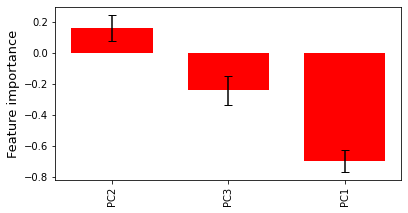

--------------------------------------------------------------
noPC+GC+use_centrality:core_histone+ATAC


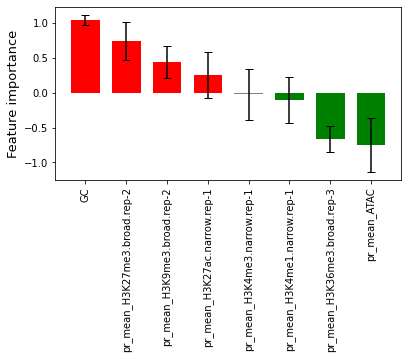

--------------------------------------------------------------
noPC+GC+use_centrality:core_histone+noATAC


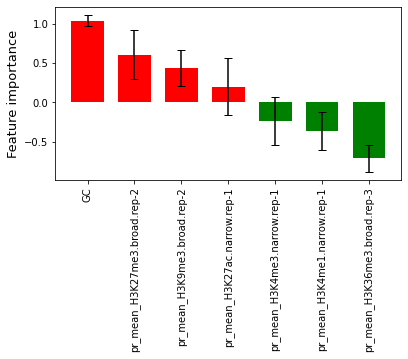

--------------------------------------------------------------
noPC+GC+use_centrality:9_histone+ATAC


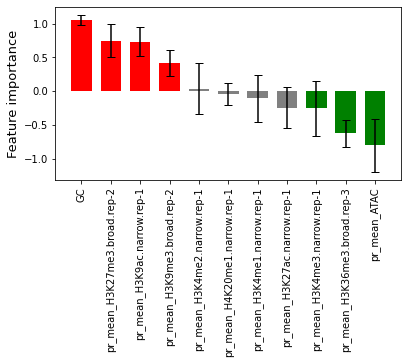

--------------------------------------------------------------
noPC+GC+use_centrality:9_histone+noATAC


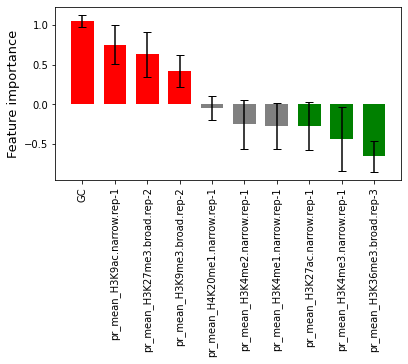

--------------------------------------------------------------
noPC+GC+use_centrality:no_histone+ATAC


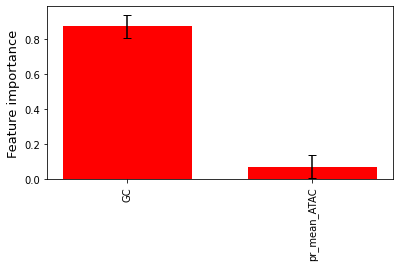

--------------------------------------------------------------
noPC+GC+use_centrality:no_histone+noATAC


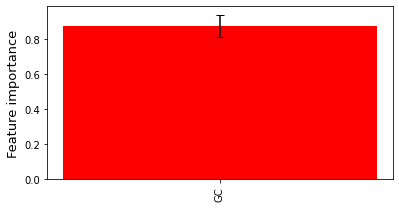

--------------------------------------------------------------
noPC+noGC+use_centrality:core_histone+ATAC


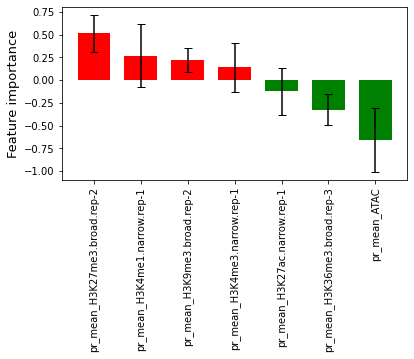

--------------------------------------------------------------
noPC+noGC+use_centrality:core_histone+noATAC


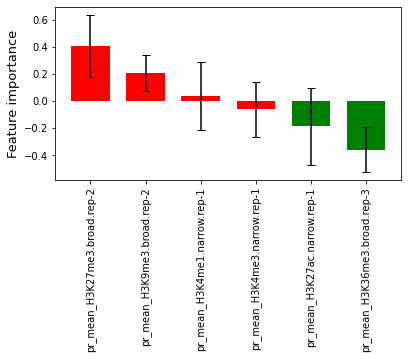

--------------------------------------------------------------
noPC+noGC+use_centrality:9_histone+ATAC


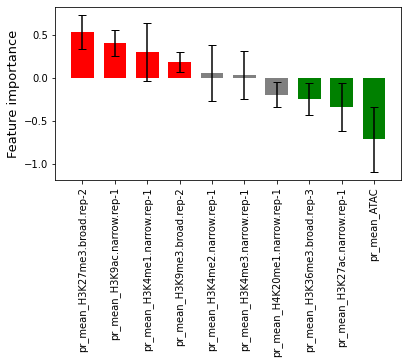

--------------------------------------------------------------
noPC+noGC+use_centrality:9_histone+noATAC


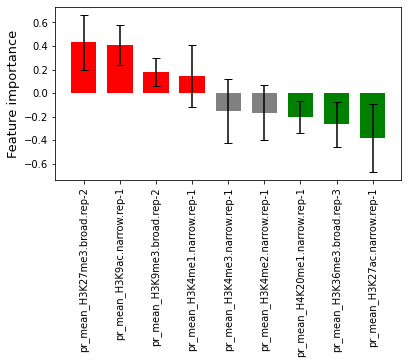

--------------------------------------------------------------
noPC+noGC+use_centrality:no_histone+ATAC


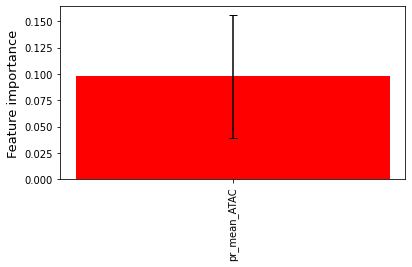

--------------------------------------------------------------
noPC+noGC+use_centrality:no_histone+noATAC


,expr,balanced_accuracy_score,average_precision_score,f1_score,recall_score,roc_auc_score,balanced_accuracy_score_err,average_precision_score_err,f1_score_err,recall_score_err,roc_auc_score_err
0,top3PC+GC+use_centrality:core_histone+ATAC,0.697493,0.142222,0.268550,0.706250,0.697493,0.043611,0.018740,0.026187,0.100972,0.043611
1,top3PC+GC+use_centrality:core_histone+noATAC,0.697871,0.141712,0.267414,0.712500,0.697871,0.040144,0.017302,0.024200,0.092492,0.040144
2,top3PC+GC+use_centrality:9_histone+ATAC,0.695793,0.141390,0.267011,0.703125,0.695793,0.045621,0.019129,0.026444,0.109375,0.045621
3,top3PC+GC+use_centrality:9_histone+noATAC,0.692857,0.139589,0.264617,0.700000,0.692857,0.039028,0.016439,0.022932,0.092913,0.039028
4,top3PC+GC+use_centrality:no_histone+ATAC,0.662002,0.124515,0.237318,0.678125,0.662002,0.036383,0.013494,0.022218,0.088444,0.036383
5,top3PC+GC+use_centrality:no_histone+noATAC,0.662328,0.124248,0.236826,0.681250,0.662328,0.033701,0.011852,0.019119,0.088167,0.033701
6,top3PC+noGC+use_centrality:core_histone+ATAC,0.685766,0.137929,0.262676,0.678125,0.685766,0.044019,0.020101,0.029913,0.091696,0.044019
7,top3PC+noGC+use_centrality:core_histone+noATAC,0.685783,0.137093,0.260587,0.687500,0.685783,0.042432,0.019123,0.028627,0.087277,0.042432
8,top3PC+noGC+use_centrality:9_histone+ATAC,0.688427,0.139307,0.264768,0.681250,0.688427,0.045980,0.020735,0.030670,0.100584,0.045980
9,top3PC+noGC+use_centrality:9_histone+noATAC,0.683568,0.136348,0.260336,0.678125,0.683568,0.038372,0.016768,0.026646,0.080344,0.038372


In [ ]:
eval_function_dict = {
    'balanced_accuracy_score':balanced_accuracy_score,
    'average_precision_score':average_precision_score,
    'confusion_matrix':confusion_matrix,
    'f1_score':f1_score,
    'classification_report':classification_report,
    'recall_score':recall_score,
    'roc_auc_score':roc_auc_score,
}

eval_function_dict = {
    'balanced_accuracy_score':balanced_accuracy_score,
    'average_precision_score':average_precision_score,
    # 'confusion_matrix':confusion_matrix,
    'f1_score':f1_score,
    # 'classification_report':classification_report,
    'recall_score':recall_score,
    'roc_auc_score':roc_auc_score,
}


ess_dict = {0:'Noness', 1:'Ess'}

PCs_to_use_dict = {
    # 'top2PC':[1,2],
    # 'PC2,3':[2,3],
    'top3PC':[1,2,3],
    # 'PC2,3,4':[2,3,4],
    # 'top4PC':[1,2,3,4],
    # 'top10PC':list(np.arange(1,11)),
    # 'top20PC':list(np.arange(1,21)),
    # 'top30PC':list(np.arange(1,31)),
    'noPC':[]
}

GC_dict = {
    'GC':['GC'],
    'noGC':[],
}

histone_feature_dict = {
    'core_histone':['H3K27ac.narrow.rep-1', 'H3K27me3.broad.rep-2', 'H3K36me3.broad.rep-3', 'H3K4me1.narrow.rep-1', 'H3K4me3.narrow.rep-1', 'H3K9me3.broad.rep-2'],
    '9_histone':['H3K27ac.narrow.rep-1', 'H3K27me3.broad.rep-2', 'H3K36me3.broad.rep-3', 'H3K4me1.narrow.rep-1', 'H3K4me2.narrow.rep-1', 'H3K4me3.narrow.rep-1',
                 'H3K9me3.broad.rep-2', 'H3K9ac.narrow.rep-1', 'H4K20me1.narrow.rep-1'],
    'no_histone':[],
}

TF_feature_dict = {
    'TFs':['CTCF.narrow.rep-1', 'RAD21.narrow.rep-1', 'SMC3.narrow.rep-1'],
    'noTFs':[],
}

ATAC_dict = {
    'ATAC':['ATAC'],
    'noATAC':[],
}



use_chip_type = {
    # 'use_peaks': (lambda x : x),
    'use_centrality': (lambda x : ['pr_mean_{}'.format(i) for i in x]),
    # 'use_scaled_centrality': (lambda x : ['pr_mean_{}.scaled'.format(i) for i in x]), # 0-1 scaled
}


feature_cols = ['CTCF.narrow.rep-1', 'CTCF.narrow.rep-2',
       'RAD21.narrow.rep-1', 'RAD21.narrow.rep-2', 'SMC3.narrow.rep-1',
       'H3K27ac.narrow.rep-1', 'H3K27me3.narrow.rep-1', 'H3K27me3.broad.rep-2',
       'H3K36me3.narrow.rep-1', 'H3K36me3.narrow.rep-2',
       'H3K36me3.broad.rep-3', 'H3K4me1.narrow.rep-1', 'H3K4me1.narrow.rep-2',
       'H3K4me2.narrow.rep-1', 'H3K4me3.narrow.rep-1', 'H3K4me3.narrow.rep-2',
       'H3K9ac.narrow.rep-1', 'H3K9ac.narrow.rep-2', 'H3K9me3.narrow.rep-1',
       'H3K9me3.broad.rep-2', 'H4K20me1.narrow.rep-1', 'ATAC']



exp_i = 0
rep_ttl = 10

variable_name_hist = []
eval_hist = {i:[] for i in eval_function_dict.keys()}
eval_err_hist = {i:[] for i in eval_function_dict.keys()}


for (PC_name, PC_col_short) in PCs_to_use_dict.items():
    for gc,gc_col in GC_dict.items():
        for chip_type, chip_type_func in use_chip_type.items(): # how to pre-proc chip peak dt
            for h_name,h_col in histone_feature_dict.items(): # add feature name to add_col
                for a_name, a_col in ATAC_dict.items():
                    print('--------------------------------------------------------------')
                    if chip_type=='use_peaks':
                        add_col = []
                    else:
                        # add_col = ['default']
                        add_col = []

                    add_col = add_col + h_col + a_col
                    variable_name = (PC_name + '+' + gc +
                                     '+' + chip_type + ':'+
                                     h_name + '+' +
                                     a_name
                                     )

                    variable_col_to_use = ['PC{}'.format(i) for i in PC_col_short] + gc_col
                    add_col_proc = chip_type_func(add_col)
                    variable_col_to_use = variable_col_to_use + add_col_proc
                    print(variable_name)
                    # print(variable_col_to_use)

                    if len(variable_col_to_use)>0:
                        exp_i += 1

                        variable_name_hist.append(variable_name)

                        ess_part = dt[dt['Ess']=='Ess'].copy().reset_index(drop=True)
                        noness_part = dt[dt['Ess']=='Noness'].copy().reset_index(drop=True)

                        # print(len(ess_part)) # 95
                        # print(len(noness_part)) # 1069

                        y_ess = np.ones((len(ess_part),))
                        X_ess = ess_part[variable_col_to_use].values
                        # split 0.3:0.7 for ess and noness individually

                        y_noness = np.zeros((len(noness_part),))
                        X_noness = noness_part[variable_col_to_use].values

                        eval_hist_this = {i:[] for i in eval_function_dict.keys()}

                        weight_df = pd.DataFrame(data = np.zeros((rep_ttl, len(variable_col_to_use))),
                         columns = variable_col_to_use)

                        for rep_run_i in range(rep_ttl):
                            X_train_ess, X_test_ess, y_train_ess, y_test_ess = train_test_split(X_ess, y_ess, test_size=0.3, random_state=rep_run_i)
                            X_train_noness, X_test_noness, y_train_noness, y_test_noness = train_test_split(X_noness, y_noness, test_size=0.3, random_state=1+rep_run_i)

                            X_train = np.vstack((X_train_ess, X_train_noness))
                            X_test = np.vstack((X_test_ess, X_test_noness))
                            y_train = np.vstack((
                                np.array(y_train_ess).reshape((-1,1)),
                                np.array(y_train_noness).reshape((-1,1))
                                )).reshape(-1,)
                            y_test = np.vstack((
                                np.array(y_test_ess).reshape((-1,1)),
                                np.array(y_test_noness).reshape((-1,1))
                                )).reshape(-1,)


                            lg = LogisticRegression(class_weight = 'balanced', max_iter=1000, random_state=2+rep_run_i,
                                                    # solver='liblinear',
                                                    )
                            scaler = preprocessing.StandardScaler().fit(X_train)
                            X_train = scaler.transform(X_train)
                            X_test = scaler.transform(X_test)
                            lg.fit(X_train, y_train,  )

                            weight_df.iloc[rep_run_i, ] = lg.coef_[0]

                            y_test_pred_prob = lg.predict_proba(X_test)[:,1] # proba of being predicted as ess
                            y_test_pred = lg.predict(X_test)
                            # print(y_test_pred.shape)
                            # tmp_dt = pd.DataFrame({
                            # 'proba':y_test_pred_prob,
                            # 'Ess':y_test,
                            # 'round':['1st']*len(y_test)
                            #     })
                            # tmp_dt['type'] = tmp_dt['round'] + ['-'] * len(tmp_dt) + [ess_dict[i] for i in tmp_dt['Ess']]
                            # tmp_dt = tmp_dt[['proba', 'type']]

                            for i,v in eval_function_dict.items():
                                eval_hist_this[i].append(v(y_test, y_test_pred,))

                        for i,v in eval_hist_this.items():
                            eval_hist[i].append(np.mean(v))
                            eval_err_hist[i].append(np.std(v))

                        fig = plt.figure()
                        ax = fig.add_axes([0.1,0.3,0.8,0.6]) # a,b,c,d : (a,b) is the southwest coord, c is width, d is height
                        chip_list_ = variable_col_to_use

                        srt_idx = np.argsort(np.mean(weight_df.iloc[:].values, axis = 0))[::-1]
                        chip_list__ = np.array(chip_list_)[srt_idx]

                        for xi, feature in enumerate(chip_list__):
                            if xi<=3:
                                c = 'red'
                            elif xi>=(len(chip_list_)-3):
                                c = 'green'
                            else:
                                c = 'gray'
                            ax.bar(x = 0.5*xi+0.5, height = np.mean(weight_df[feature]), yerr = np.std(weight_df[feature]), color = c, capsize = 4, width = 0.35, )
                        plt.xticks(np.arange(0.5,0.5+0.5*len(chip_list__),0.5), chip_list__, rotation=90)
                        plt.ylabel('Feature importance', size=13)
                        plt.show()




perf_summary = pd.DataFrame({
    'expr':variable_name_hist,
})
for i, v in eval_hist.items():
    perf_summary[i] = v
for i, v in eval_err_hist.items():
    perf_summary[i+'_err'] = v



perf_summary

In [ ]:
s = perf_summary.copy()
s = s.sort_values('balanced_accuracy_score', ascending=False).reset_index(drop=True)
s


,expr,balanced_accuracy_score,average_precision_score,f1_score,recall_score,roc_auc_score,balanced_accuracy_score_err,average_precision_score_err,f1_score_err,recall_score_err,roc_auc_score_err
0,top3PC+GC+use_centrality:core_histone+noATAC,0.697871,0.141712,0.267414,0.712500,0.697871,0.040144,0.017302,0.024200,0.092492,0.040144
1,top3PC+GC+use_centrality:core_histone+ATAC,0.697493,0.142222,0.268550,0.706250,0.697493,0.043611,0.018740,0.026187,0.100972,0.043611
2,noPC+GC+use_centrality:9_histone+ATAC,0.695948,0.141098,0.264752,0.712500,0.695948,0.052196,0.021150,0.031249,0.115920,0.052196
3,top3PC+GC+use_centrality:9_histone+ATAC,0.695793,0.141390,0.267011,0.703125,0.695793,0.045621,0.019129,0.026444,0.109375,0.045621
4,top3PC+GC+use_centrality:9_histone+noATAC,0.692857,0.139589,0.264617,0.700000,0.692857,0.039028,0.016439,0.022932,0.092913,0.039028
5,noPC+GC+use_centrality:9_histone+noATAC,0.691260,0.139080,0.261853,0.703125,0.691260,0.051222,0.021402,0.031225,0.111146,0.051222
6,top3PC+noGC+use_centrality:9_histone+ATAC,0.688427,0.139307,0.264768,0.681250,0.688427,0.045980,0.020735,0.030670,0.100584,0.045980
7,noPC+GC+use_centrality:core_histone+noATAC,0.686624,0.136945,0.257960,0.696875,0.686624,0.053666,0.022499,0.032251,0.116969,0.053666
8,top3PC+noGC+use_centrality:core_histone+noATAC,0.685783,0.137093,0.260587,0.687500,0.685783,0.042432,0.019123,0.028627,0.087277,0.042432
9,top3PC+noGC+use_centrality:core_histone+ATAC,0.685766,0.137929,0.262676,0.678125,0.685766,0.044019,0.020101,0.029913,0.091696,0.044019
